# Detection Samples

In [5]:
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [23]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.WEIGHTS = "output/model_final.pth" # Our Model
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 
cfg.MODEL.DEVICE = "cuda" 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

predictor = DefaultPredictor(cfg)

In [26]:
base_path = 'C:/Users/User/Desktop/Red Cross/redcross_hp'

img_paths = [
    'split/5564577433630882_right.jpg',
    'split/1290873231728690_left.jpg',
    'split/6008305875848515_left.jpg',
    'split/5782274025128794_right.jpg',
    'split/418729973742872_right.jpg'
]

ab_paths = ['/'.join([base_path, path]) for path in img_paths]

In [19]:
os.path.exists(ab_paths[0])

True

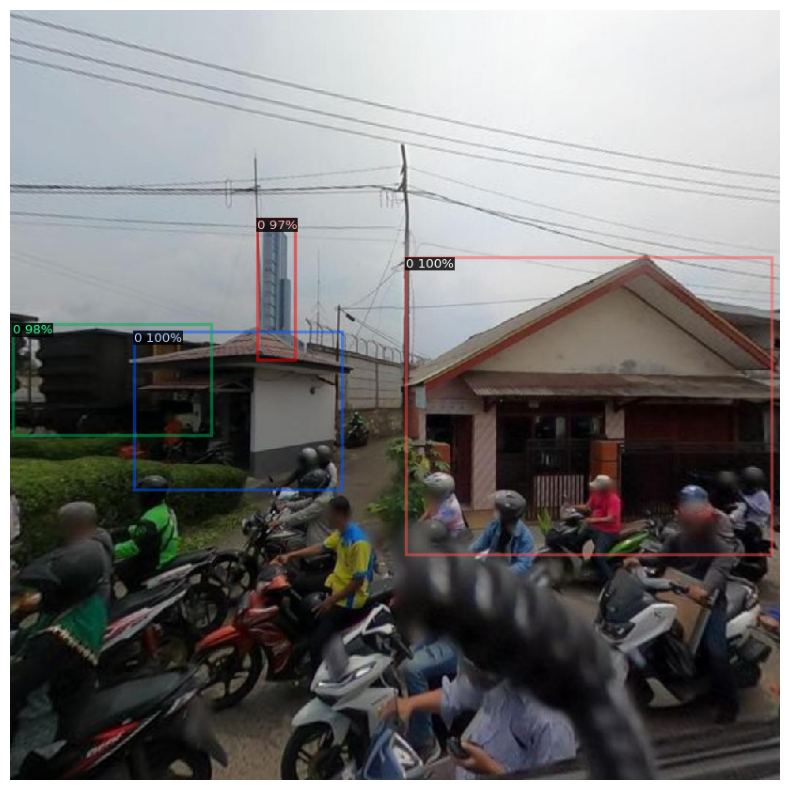

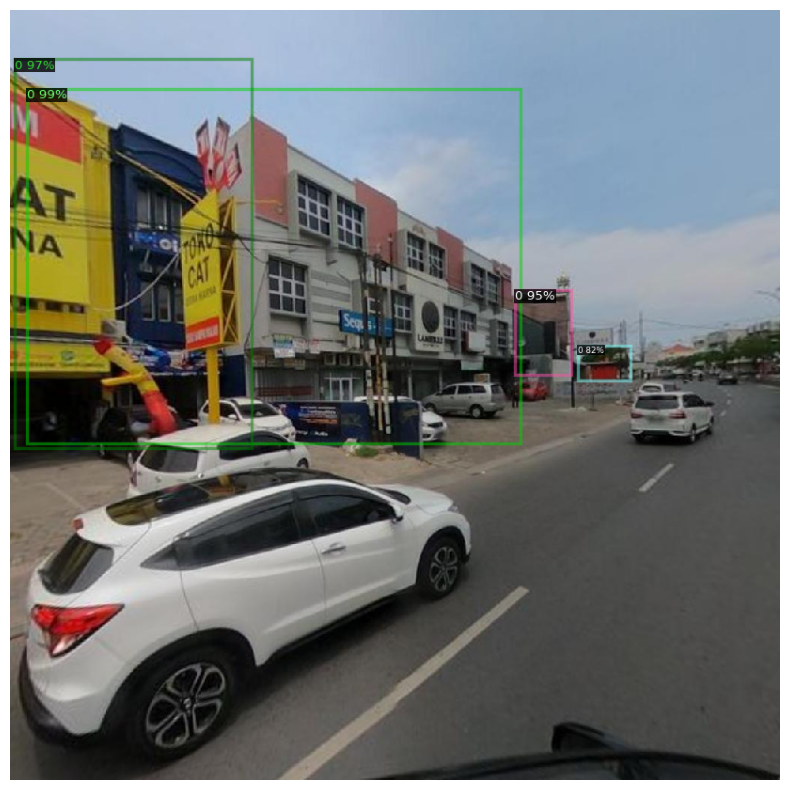

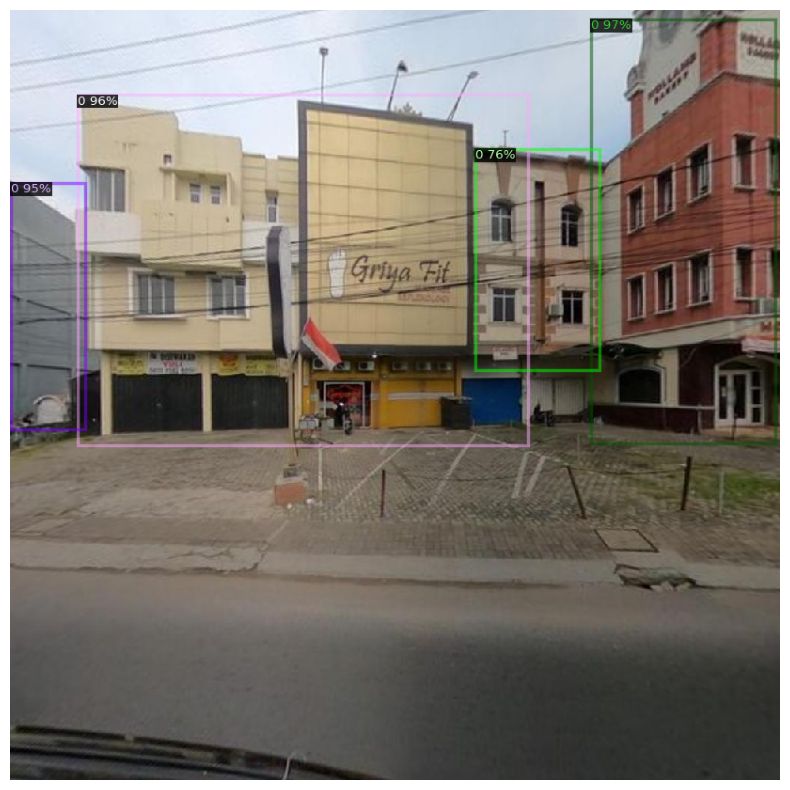

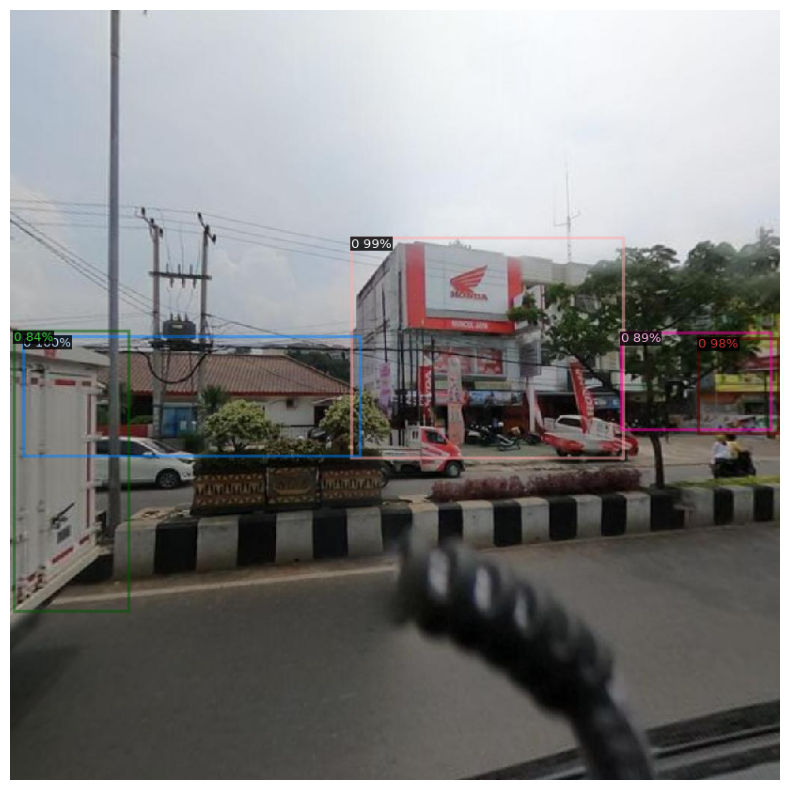

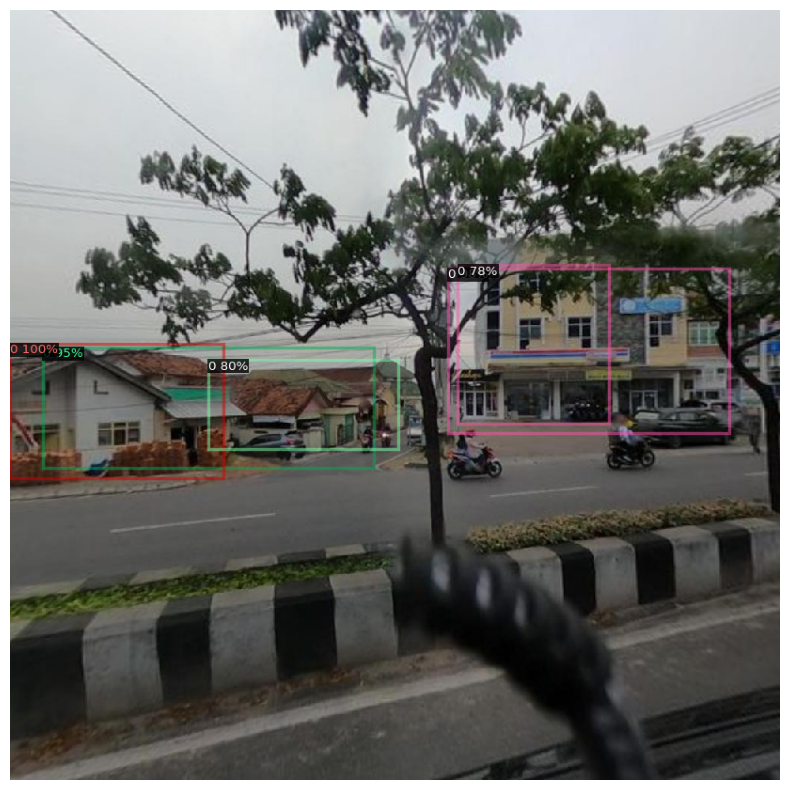

In [27]:
for path in ['/'.join([base_path, path]) for path in img_paths]:

    im = cv2.imread(path)
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # Convert RGB

    # Predict
    outputs = predictor(im)
    v = Visualizer(im_rgb[:, :, ::-1], metadata=MetadataCatalog.get("my_dataset_train"), scale=0.8)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    output_image = out.get_image()[:, :, ::-1]

    plt.figure(figsize=(10, 10))
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()